In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import os
from tqdm import tqdm_notebook

In [8]:
PATH = '../../data/landmarks/aligned/'
SIZE = (224,224,3)
BEFO = PATH + 'before_4/'
AFTE = PATH + 'after_4/'
LABE = PATH + 'labels/reformated_8698.csv'


In [3]:
df = pd.read_csv(LABE)

In [4]:
del df['Unnamed: 0']

In [5]:
filenames = df['filename']
col = df.columns
coord = np.array([[df[col[i]][j] for i in range(1,len(col))] for j in range(len(df))])

In [7]:
df.head()

filename  lex  ley  rex  rey  nox  noy
0    272100.272100.jpg  122  175  230  185  149  319
1  272100.272100_0.jpg  196  161  287  175  172  296
2  272100.272100_1.jpg  404  125  447  116  441  177
3  272100.272100_2.jpg  100   95  155  103  113  168
4  272100.272100_4.jpg  158   75  215   79  177  139

In [12]:
for i in range(len(df)):
    fig = plt.figure()
    im = plt.imread(BEFO+df['filename'][i])
    plt.imshow(im)
    plt.plot(coord[i][0::2],coord[i][1::2],'o')
    plt.xticks([])
    plt.yticks([])
    fig.savefig(AFTE+df['filename'][i])
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/landmarks/aligned/before_4/dog12.IMG_0884.JPG'

<Figure size 432x288 with 0 Axes>

508


([], <a list of 0 Text yticklabel objects>)

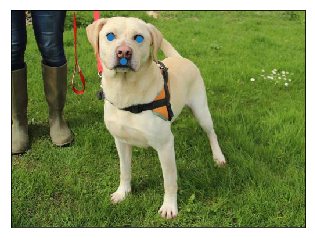

In [6]:
# Test
im = plt.imread(BEFO+df['filename'][200])
print(len(im[0]))
plt.imshow(im)
plt.plot(coord[200][0::2],coord[200][1::2],'o')
plt.xticks([])
plt.yticks([])

In [6]:
def solve(coord):
    A = np.array([
        [coord[0],-coord[1],1,0],
        [coord[1],coord[0],0,1],
        [coord[2],-coord[3],1,0],
        [coord[3],coord[2],0,1],
    ])
    h,w,c = SIZE
    
    ab = np.array([coord[0]-coord[2],coord[1]-coord[3]])
    ac = np.array([coord[0]-coord[4],coord[1]-coord[5]])
    norm_ab = np.linalg.norm(ab)
    d = ac.dot(ab)/norm_ab
    # If the head is too turned then we zoom out
    if d < 0 or d > norm_ab:
        #r = d / norm_ab
        y = 1/2-1/9
        x1 = 1/2-1/10
        x2 = 1/2+1/10
    else:
        y = 1/2-1/9
        x1 = 1/2-1/7
        x2 = 1/2+1/7
    b = [x1*h,y*w,x2*h,y*w]
    #b = [1*h/3,1*w/3,2*h/3,1*w/3]
    #b = [0.7*h/2.4,0.7*w/2.4,1.7*h/2.4,0.7*w/2.4]
    sol = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(b))
    return np.array([[sol[0], -sol[1], sol[2]],[sol[1], sol[0], sol[3]], [0,0,1]])

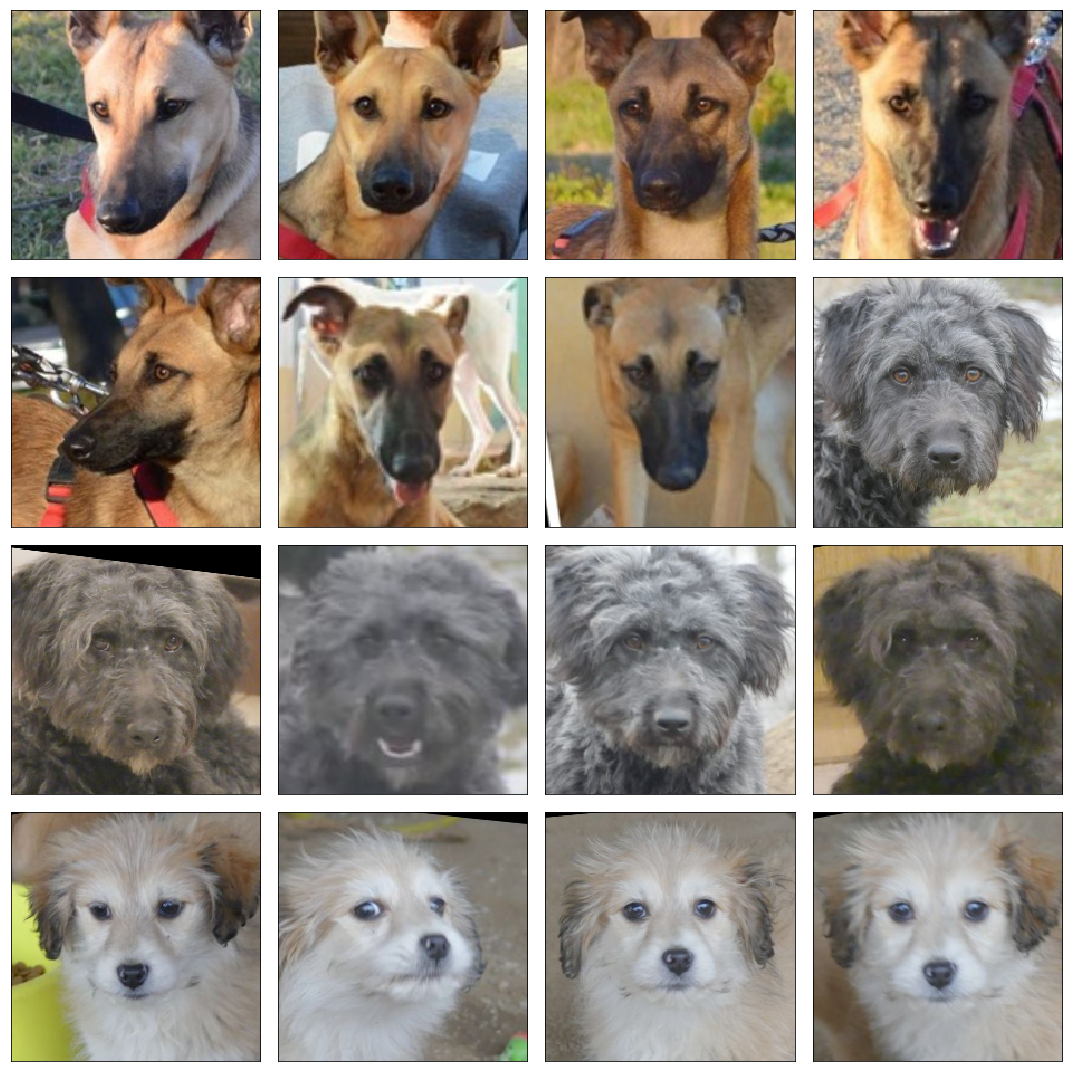

In [36]:
# Test
off = 4500
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(BEFO+df['filename'][i+off])
    sk.io.imshow(image)
    M = solve(coord[i+off])
    test = sk.transform.warp(image, np.linalg.inv(M))
    h,w,c = SIZE
    test = test[:h,:w]
    sk.io.imshow(test)

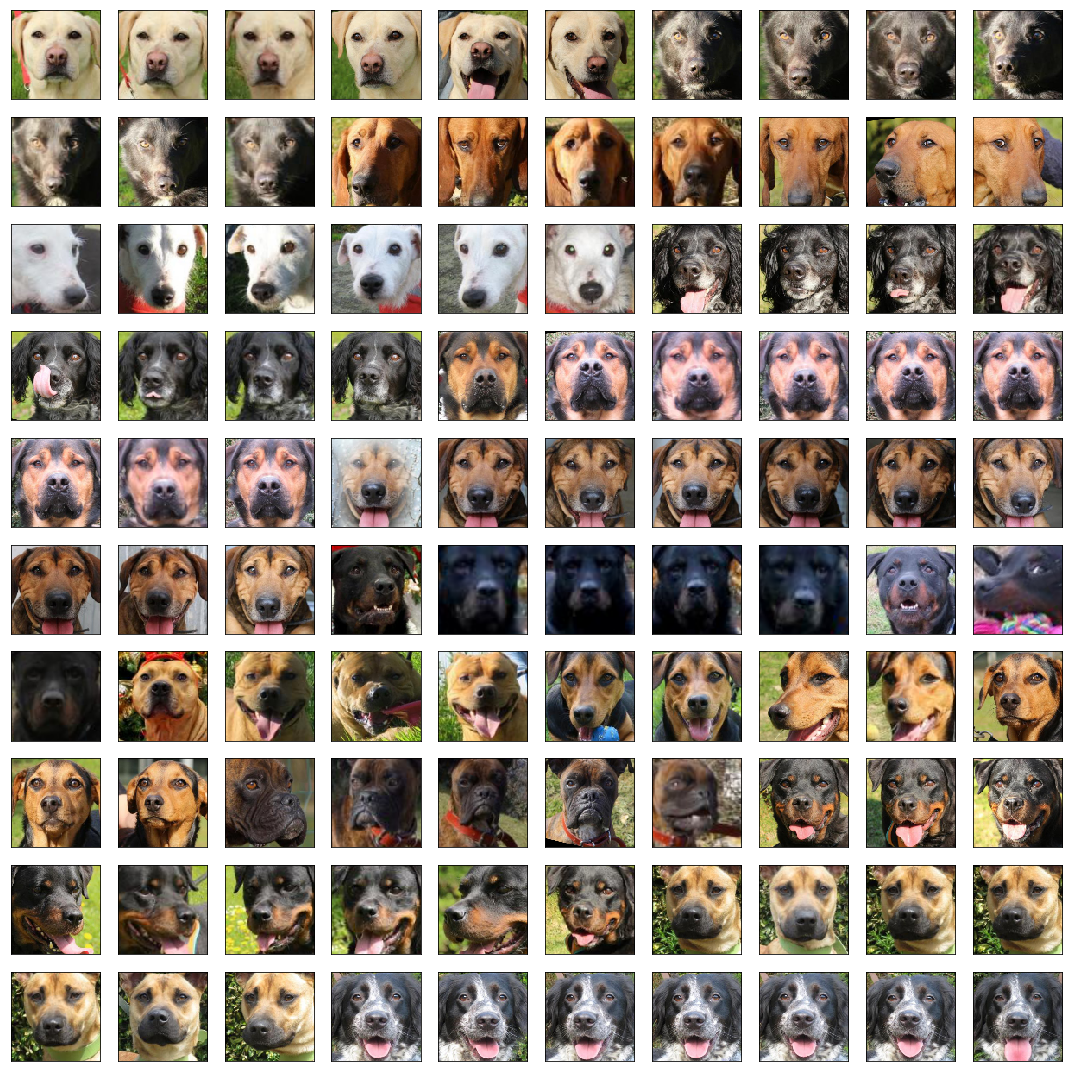

In [22]:
# Test
off = 200
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(BEFO+df['filename'][i+off])
    sk.io.imshow(image)
    M = solve(coord[i+off])
    test = sk.transform.warp(image, np.linalg.inv(M))
    h,w,c = SIZE
    test = test[:h,:w]
    sk.io.imshow(test)

In [37]:
listimage = os.listdir(BEFO)

for i in tqdm_notebook(range(0,len(df))):
    if df['filename'][i] in listimage:
        print(df['filename'][i])
        image = sk.io.imread(BEFO+df['filename'][i])
    else:
        print(df['filename'][i])
    if len(image.shape)==3:
        image = image[:,:,:3]
        M = solve(coord[i])
        test = sk.transform.warp(image, np.linalg.inv(M))
        h,w,c = SIZE
        test = test[:h,:w]
        if test.shape != SIZE:
            test = sk.transform.resize(test,SIZE,anti_aliasing=True)

        # Create folder and save image
        filename = df['filename'][i]
        idx = filename.find('.')
        if idx < 2:
            idx = filename[idx+1:].find('.')
        foldername = filename[:idx]
        if not os.path.exists(AFTE+foldername):
            os.mkdir(AFTE+foldername)

        sk.io.imsave(AFTE+foldername+'/'+filename[idx+1:],test)

HBox(children=(IntProgress(value=0, max=8698), HTML(value='')))

272100.272100.jpg


c:\users\guillaume\anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


272100.272100_0.jpg
272100.272100_1.jpg
272100.272100_2.jpg
272100.272100_4.jpg
272100.272100_5.jpg
272774.272774.jpg
272774.272774_0.jpeg
272774.272774_0.jpg
272774.272774_1.jpg
272774.272774_2.jpg
272774.272774_3.jpg
272986.272986.jpeg
272986.272986.jpg
272986.272986_0.jpg
272986.272986_1.jpg
272986.272986_2.jpg
272986.272986_5.jpg
272986.272986_6.jpg
274575.274575.jpeg
274575.274575.jpg
274575.274575_0.jpeg
274575.274575_0.jpg
274575.274575_1.jpg
274575.274575_2.jpg
274575.274575_3.jpg
274575.274575_4.jpg
276562.276562_0.jpg
276562.276562_2.jpg
276562.276562_3.jpg
276562.276562_4.jpg
276562.276562_5.jpg
276562.276562_6.jpg
277097.277097.jpg
277097.277097_1.JPG
277097.277097_2.JPG
277097.277097_3.JPG
277097.277097_4.JPG
277097.277097_5.JPG
277127.277127.jpg
277127.277127_0.jpg
277127.277127_1.JPG
277127.277127_2.JPG
277127.277127_3.JPG
277127.277127_4.JPG
277127.277127_5.JPG
277127.277127_6.JPG
284418.284418.jpg
284418.284418_0.jpg
284418.284418_1.jpg
284418.284418_2.jpg
284418.28441

dog4.1.jpg
dog4.2.jpg
dog4.3.jpg
dog4.4.jpg
dog4.5.jpg
dog4.6.jpg
dog4.7.jpg
dog4.8.jpg
dog5.DSCF1287.JPG
dog5.DSCF1289.JPG
dog5.DSCF1290.JPG
dog5.DSCF1291.JPG
dog5.DSCF1292.JPG
dog5.DSCF1297.JPG
dog5.DSCF1298.JPG
dog5.DSCF1299.JPG
dog5.DSCF1300.JPG
dog5.DSCF1309.JPG
dog5.DSCF1314.JPG
dog5.DSCF1317.JPG
dog5.DSCF1319.JPG
dog5.DSCF1321.JPG
dog5.DSCF1322.JPG
dog5.DSCF1323.JPG
dog5.DSCF1324.JPG
dog5.DSCF1325.JPG
dog6.1541395288385.JPEG
dog6.1541395288449.JPEG
dog6.1541395288493.JPEG
dog6.1541395288537.JPEG
dog6.1541395288579.JPEG
dog6.1541395288619.JPEG
dog6.1541395288666.JPEG
dog6.1541395288713.JPEG
dog6.1541395288755.JPEG
dog6.1541395288809.JPEG
dog6.1541395288852.JPEG
dog6.1541395288895.JPEG
dog6.1541395288941.JPEG
dog6.1541395289006.JPEG
dog6.1541395289048.JPEG
dog6.1541395289110.JPEG
dog6.1541395289150.JPEG
dog6.1541395289190.JPEG
dog6.1541395289230.JPEG
dog6.1541395289270.JPEG
dog6.1541395289468.JPEG
dog6.1541395289662.JPEG
dog8.2011november 007.jpg
dog8.2011november 008.jpg
dog8.201

394563.394563_3.jpg
394845.394845.jpg
394845.394845_1.jpg
394845.394845_2.jpg
394845.394845_3.jpg
394845.394845_4.jpg
394997.394997.jpg
394997.394997_0.jpg
394997.394997_1.jpg
394997.394997_2.jpg
394997.394997_3.jpg
395094.395094.jpg
395094.395094_0.jpg
395094.395094_1.jpg
395094.395094_2.jpg
395094.395094_3.jpg
395129.395129.jpg
395129.395129_0.jpg
395129.395129_1.jpg
395129.395129_2.jpg
395228.395228.jpg
395228.395228_1.jpg
395228.395228_3.jpg
395369.395369.jpg
395369.395369_0.jpg
395369.395369_1.jpg
395369.395369_2.jpg
395369.395369_3.jpg
395369.395369_4.jpg
395462.395462_3.jpg
395511.395511_2.jpg
395511.395511_4.jpg
395627.395627.jpg
395627.395627_0.jpg
395627.395627_3.jpg
395898.395898.jpg
395898.395898_0.jpg
395898.395898_1.jpg
395898.395898_2.jpg
395898.395898_3.jpg
395991.395991.jpg
395991.395991_0.jpg
395991.395991_1.jpg
395991.395991_2.jpg
395991.395991_3.jpg
396044.396044.jpg
396044.396044_0.jpg
396044.396044_1.jpg
396044.396044_3.jpg
396105_0.396105_1.jpg
396105_0.396105_2.

carla.id83e6b4c1e576647.jpg
carla.ie11afe491538b369.jpg
carla.if93bd1738046da43.jpg
carla.if99e8b59a656afeb.jpg
charlie.i5a4f5c8bc01aed58.jpg
charlie.i5aa4ef995eda7f43.jpg
charlie.i5c78ec297fa94e91.jpg
charlie.i71f8e6dda9589aae.jpg
charlie.i93eaf9a25c533b5c.jpg
charlie.i426d58322b0f1497.jpg
charlie.i780f34a20bc2819f.jpg
charlie.i189589c7ec37c53d.jpg
charlie.i487425ee0ba89843.jpg
charlie.i43972456fd4257f3.jpg
charlie.i3889250314acf297.jpg
charlie.ia7dd9a575c51ae29.jpg
charlie.iadda1c72489332cf.jpg
charlie.ib092070e5c1effe5.jpg
charlie.ice72bcf2f0472ccf.jpg
charlie.id512c5f879fb49f7.jpg
charlie.id6542de691ad6e55.jpg
charlie.ifbdb619a725951cd.jpg
chrissi.i1f5617130c166d61.jpg
chrissi.i57d8d9932f937ae5.jpg
chrissi.i07971ec55a74c53f.jpg
clara.i0bb2eafaa4d8ebf4.jpg
clara.i8a0d37d2530fea1f.jpg
clara.if2353e0f57f311c8.jpg
clive.i8cb41f7e69ef024c.jpg
clive.i1975f617d23f595c.jpg
clive.id0787be2278ca003.jpg
clive.id83924d5b4c55977.jpg
clive.idd6972bc419fe0f2.jpg
clive.ief014e709a8e3d3a.jpg
clive.

ronja.idfd0dc16790defc9.jpg
ronja.ieca80423eeeb4e44.jpg
ronja.iffb501be160064c8.jpg
scissors.i1ca2c17e8ef4f20b.jpg
scissors.i1d05d7e3a2cf60b6.jpg
scissors.i1d5db622012d2509.jpg
scissors.i3ebe22103013f977.jpg
scissors.i5e11719c6fe99892.jpg
scissors.i6cda1cad99286606.jpg
scissors.i7abfc346ebcffd31.jpg
scissors.i18da10b5cacf10a4.jpg
scissors.i41a95d78b04c7991.jpg
scissors.i61a7c974330d6ac0.jpg
scissors.i852edbb383ea728d.jpg
scissors.iab2f29036f3cc81c.jpg
scissors.iaeccda57bd2f87dc.jpg
scissors.ic2fd727f4ad66d03.jpg
scissors.ie6ee432fe5d264bb.jpg
scissors.ie9fe4bc52a5788dc.jpg
scissors.ie121d75c1234c5b7.jpg
scissors.ife45bb0537953ba6.jpg
shamy.i55ece19c6d47206b.jpg
shamy.i3259d0880bbbaa24.jpg
shamy.i1750876d8cd596dc.jpg
shamy.ia10a373f3132cbbf.jpg
shamy.ib2134a06c2e772e5.jpg
shamy.id29592dec5b37347.jpg
shamy.iffaad0bc69eaae6c.jpg
shark.i0cd8f19fbebe9a87.jpg
shark.i1af75180bf980240.jpg
shark.i5b2dfcf0f7916f4b.jpg
shark.i8a339538b566f52b.jpg
shark.i9ffb304225836db1.jpg
shark.i27e9cf171106028

69079-bezaubernder-wunderschoener-za.rnder-wunderschoener-zando-m-1-j-sucht-liebev-fam_69079_4.jpg
69079-bezaubernder-wunderschoener-za.rnder-wunderschoener-zando-m-1-j-sucht-liebev-fam_69079_6.jpg
69080-phantastischer-bildschoener-zs.tischer-bildschoener-zsemle-m-1-j-sucht-liebev-fam_69080_3.jpg
69080-phantastischer-bildschoener-zs.tischer-bildschoener-zsemle-m-1-j-sucht-liebev-fam_69080_4.jpg
69080-phantastischer-bildschoener-zs.tischer-bildschoener-zsemle-m-1-j-sucht-liebev-fam_69080_5.jpg
69081-bildschoener-bezaubernder-zico.oener-bezaubernder-zico-m-1-j-sucht-liebevolle-fam_69081_1.jpg
69082-phantastischer-sanfter-szibi-m.tischer-sanfter-szibi-m-2-j-sucht-liebevolle-fam_69082_2.jpg
69082-phantastischer-sanfter-szibi-m.tischer-sanfter-szibi-m-2-j-sucht-liebevolle-fam_69082_3.jpg
69082-phantastischer-sanfter-szibi-m.tischer-sanfter-szibi-m-2-j-sucht-liebevolle-fam_69082_4.jpg
69084-kentucky-geb-ca-03-2017-maennl.y-geb-ca-03-2017-maennlich-kastriert_69084_1.jpg
69084-kentucky-geb-ca-

69218-wundervoller-sehr-lieber-boton.oller-sehr-lieber-botond-m-1-j-sucht-liebevolle-fam_69218_1.jpg
69218-wundervoller-sehr-lieber-boton.oller-sehr-lieber-botond-m-1-j-sucht-liebevolle-fam_69218_3.jpg
69219-wundervolle-bildschoene-bolhas.olle-bildschoene-bolhas-w-6-j-sucht-liebevolle-fam_69219_2.jpg
69219-wundervolle-bildschoene-bolhas.olle-bildschoene-bolhas-w-6-j-sucht-liebevolle-fam_69219_5.jpg
69219-wundervolle-bildschoene-bolhas.olle-bildschoene-bolhas-w-6-j-sucht-liebevolle-fam_69219_6.jpg
69220-phantastischer-bildschoener-cl.tischer-bildschoener-cloud-m-1-j-sucht-liebevolle-fam_69220_1.jpg
69220-phantastischer-bildschoener-cl.tischer-bildschoener-cloud-m-1-j-sucht-liebevolle-fam_69220_2.jpg
69220-phantastischer-bildschoener-cl.tischer-bildschoener-cloud-m-1-j-sucht-liebevolle-fam_69220_3.jpg
69221-bezaubernde-bildschoene-daisy-.rnde-bildschoene-daisy-w-1-j-sucht-liebevolle-fam_69221_1.jpg
69221-bezaubernde-bildschoene-daisy-.rnde-bildschoene-daisy-w-1-j-sucht-liebevolle-fam_692

69318-sehr-menschenbezogene-scarlett.nschenbezogene-scarlett-w-1-j-sucht-liebevolle-fam_69318_5.jpg
69320-verschmuster-lieber-lennox-m-3.uster-lieber-lennox-m-3-j-sucht-aktive-liebev-fam_69320_2.jpg
69320-verschmuster-lieber-lennox-m-3.uster-lieber-lennox-m-3-j-sucht-aktive-liebev-fam_69320_5.jpg
69320-verschmuster-lieber-lennox-m-3.uster-lieber-lennox-m-3-j-sucht-aktive-liebev-fam_69320_6.jpg
69321-sehr-menschenbezogener-nash-m-.nschenbezogener-nash-m-2-j-sucht-aktive-liebev-fam_69321_1.jpg
69321-sehr-menschenbezogener-nash-m-.nschenbezogener-nash-m-2-j-sucht-aktive-liebev-fam_69321_2.jpg
69321-sehr-menschenbezogener-nash-m-.nschenbezogener-nash-m-2-j-sucht-aktive-liebev-fam_69321_5.jpg
69321-sehr-menschenbezogener-nash-m-.nschenbezogener-nash-m-2-j-sucht-aktive-liebev-fam_69321_6.jpg
69369-powerhuendin-auf-drei-beinen-k.endin-auf-drei-beinen-kenna-23-mt-13-5-kg-47-cm_69369_7.jpg
69369-powerhuendin-auf-drei-beinen-k.endin-auf-drei-beinen-kenna-23-mt-13-5-kg-47-cm_69369_8.jpg
69369-pow

69598-carlotta-moechte-gerne-sesshaf.a-moechte-gerne-sesshaft-werden_69598_6.jpg
69602-riesenschnauzermischlingswelpe.chnauzermischlingswelpen-im-aargau_69602_2.jpg
69602-riesenschnauzermischlingswelpe.chnauzermischlingswelpen-im-aargau_69602_6.jpg
69607-copito-lustiger-mischlingshund.lustiger-mischlingshund_69607_1.jpg
69607-copito-lustiger-mischlingshund.lustiger-mischlingshund_69607_2.jpg
69607-copito-lustiger-mischlingshund.lustiger-mischlingshund_69607_3.jpg
69607-copito-lustiger-mischlingshund.lustiger-mischlingshund_69607_4.jpg
69607-copito-lustiger-mischlingshund.lustiger-mischlingshund_69607_5.jpg
69632-hektor-geb-ca-10-2015-maennlic.geb-ca-10-2015-maennlich-kastriert_69632_1.jpg
69632-hektor-geb-ca-10-2015-maennlic.geb-ca-10-2015-maennlich-kastriert_69632_2.jpg
69632-hektor-geb-ca-10-2015-maennlic.geb-ca-10-2015-maennlich-kastriert_69632_3.jpg
69632-hektor-geb-ca-10-2015-maennlic.geb-ca-10-2015-maennlich-kastriert_69632_4.jpg
69632-hektor-geb-ca-10-2015-maennlic.geb-ca-10-201

69828-milka-geb-ca-06-2017-weiblich-.eb-ca-06-2017-weiblich-kastriert_69828_5.jpg
69828-milka-geb-ca-06-2017-weiblich-.eb-ca-06-2017-weiblich-kastriert_69828_6.jpg
69829-schari-geb-ca-06-2016-maennlic.geb-ca-06-2016-maennlich-kastriert_69829_1.jpg
69829-schari-geb-ca-06-2016-maennlic.geb-ca-06-2016-maennlich-kastriert_69829_2.jpg
69829-schari-geb-ca-06-2016-maennlic.geb-ca-06-2016-maennlich-kastriert_69829_3.jpg
69829-schari-geb-ca-06-2016-maennlic.geb-ca-06-2016-maennlich-kastriert_69829_4.jpg
69829-schari-geb-ca-06-2016-maennlic.geb-ca-06-2016-maennlich-kastriert_69829_5.jpg
69829-schari-geb-ca-06-2016-maennlic.geb-ca-06-2016-maennlich-kastriert_69829_6.jpg
69830-nala-geb-ca-06-2017-weiblich-k.b-ca-06-2017-weiblich-kastriert_69830_1.jpg
69830-nala-geb-ca-06-2017-weiblich-k.b-ca-06-2017-weiblich-kastriert_69830_3.jpg
69830-nala-geb-ca-06-2017-weiblich-k.b-ca-06-2017-weiblich-kastriert_69830_5.jpg
69833-kocos-4-aufgestellte-suesse-hu.-aufgestellte-suesse-huendin_69833_1.jpg
69833-kocos

69991-artus-sucht-einfuehlsame-mensc.ucht-einfuehlsame-menschen_69991_1.jpg
69991-artus-sucht-einfuehlsame-mensc.ucht-einfuehlsame-menschen_69991_2.jpg
69991-artus-sucht-einfuehlsame-mensc.ucht-einfuehlsame-menschen_69991_3.jpg
69991-artus-sucht-einfuehlsame-mensc.ucht-einfuehlsame-menschen_69991_4.jpg
69991-artus-sucht-einfuehlsame-mensc.ucht-einfuehlsame-menschen_69991_5.jpg
69991-artus-sucht-einfuehlsame-mensc.ucht-einfuehlsame-menschen_69991_6.jpg
69999-fido-kleiner-prinz.einer-prinz_69999_1.jpg
69999-fido-kleiner-prinz.einer-prinz_69999_3.jpg
69999-fido-kleiner-prinz.einer-prinz_69999_4.jpg
69999-fido-kleiner-prinz.einer-prinz_69999_5.jpg
70002-ebba-perfekte-begleiterin-fuer.rfekte-begleiterin-fuer-sportliche-menschen_70002_1.jpg
70002-ebba-perfekte-begleiterin-fuer.rfekte-begleiterin-fuer-sportliche-menschen_70002_2.jpg
70002-ebba-perfekte-begleiterin-fuer.rfekte-begleiterin-fuer-sportliche-menschen_70002_6.jpg
70002-ebba-perfekte-begleiterin-fuer.rfekte-begleiterin-fuer-sportlic

70032-karol-ca-5-j-09-2013-ca-71-cm-.a-5-j-09-2013-ca-71-cm-maennl-kastriert_70032_3.jpg
70032-karol-ca-5-j-09-2013-ca-71-cm-.a-5-j-09-2013-ca-71-cm-maennl-kastriert_70032_4.jpg
70032-karol-ca-5-j-09-2013-ca-71-cm-.a-5-j-09-2013-ca-71-cm-maennl-kastriert_70032_6.jpg
70033-pepper-ca-1-j-10-2017-ca-51-cm.ca-1-j-10-2017-ca-51-cm-maennl-kastriert_70033_1.jpg
70033-pepper-ca-1-j-10-2017-ca-51-cm.ca-1-j-10-2017-ca-51-cm-maennl-kastriert_70033_2.jpg
70033-pepper-ca-1-j-10-2017-ca-51-cm.ca-1-j-10-2017-ca-51-cm-maennl-kastriert_70033_3.jpg
70033-pepper-ca-1-j-10-2017-ca-51-cm.ca-1-j-10-2017-ca-51-cm-maennl-kastriert_70033_4.jpg
70033-pepper-ca-1-j-10-2017-ca-51-cm.ca-1-j-10-2017-ca-51-cm-maennl-kastriert_70033_6.jpg
70036-nico-geb-ca-05-2018-maennlich-.b-ca-05-2018-maennlich-kastriert_70036_2.jpg
70036-nico-geb-ca-05-2018-maennlich-.b-ca-05-2018-maennlich-kastriert_70036_4.jpg
70036-nico-geb-ca-05-2018-maennlich-.b-ca-05-2018-maennlich-kastriert_70036_5.jpg
70036-nico-geb-ca-05-2018-maennlich-.

70172-der-kleine-bobby-sucht-eine-fa.ine-bobby-sucht-eine-familie_70172_2.jpg
70172-der-kleine-bobby-sucht-eine-fa.ine-bobby-sucht-eine-familie_70172_3.jpg
70172-der-kleine-bobby-sucht-eine-fa.ine-bobby-sucht-eine-familie_70172_4.jpg
70172-der-kleine-bobby-sucht-eine-fa.ine-bobby-sucht-eine-familie_70172_5.jpg
70172-der-kleine-bobby-sucht-eine-fa.ine-bobby-sucht-eine-familie_70172_6.jpg
70173-nerina-sucht-eine-familie.sucht-eine-familie_70173_2.jpg
70173-nerina-sucht-eine-familie.sucht-eine-familie_70173_3.jpg
70173-nerina-sucht-eine-familie.sucht-eine-familie_70173_4.jpg
70174-judy-ist-ein-ganz-reizende-kle.t-ein-ganz-reizende-kleine-lady_70174_1.jpg
70174-judy-ist-ein-ganz-reizende-kle.t-ein-ganz-reizende-kleine-lady_70174_2.jpg
70174-judy-ist-ein-ganz-reizende-kle.t-ein-ganz-reizende-kleine-lady_70174_3.jpg
70174-judy-ist-ein-ganz-reizende-kle.t-ein-ganz-reizende-kleine-lady_70174_4.jpg
70174-judy-ist-ein-ganz-reizende-kle.t-ein-ganz-reizende-kleine-lady_70174_5.jpg
70176-zuckerschn

70277-wunderschoene-tanja-w-1-j-such.choene-tanja-w-1-j-sucht-liebevolle-sportliche-fam_70277_4.jpg
70286-bildschoener-menschenbezogener.oener-menschenbezogener-vandor-m-9-j-sucht-liebev-fam_70286_2.jpg
70286-bildschoener-menschenbezogener.oener-menschenbezogener-vandor-m-9-j-sucht-liebev-fam_70286_3.jpg
70286-bildschoener-menschenbezogener.oener-menschenbezogener-vandor-m-9-j-sucht-liebev-fam_70286_4.jpg
70286-bildschoener-menschenbezogener.oener-menschenbezogener-vandor-m-9-j-sucht-liebev-fam_70286_5.jpg
70286-bildschoener-menschenbezogener.oener-menschenbezogener-vandor-m-9-j-sucht-liebev-fam_70286_6.jpg
70296-wunderschoener-herziger-michae.choener-herziger-michael-m-1-8-j-sucht-liebev-fam_70296_2.jpg
70296-wunderschoener-herziger-michae.choener-herziger-michael-m-1-8-j-sucht-liebev-fam_70296_3.jpg
70296-wunderschoener-herziger-michae.choener-herziger-michael-m-1-8-j-sucht-liebev-fam_70296_5.jpg
70299-hinreissender-wundervoller-the.sender-wundervoller-theodor-m-4-j-sucht-liebev-fam_

70374-willy-ca-5-j-12-2013-ca-30-cm-.a-5-j-12-2013-ca-30-cm-ca-4-5-kg-maennl-kastr_70374_5.jpg
70381-freundlicher-braver-mischl-bub.icher-braver-mischl-bub-7j_70381_1.jpg
70381-freundlicher-braver-mischl-bub.icher-braver-mischl-bub-7j_70381_2.jpg
70381-freundlicher-braver-mischl-bub.icher-braver-mischl-bub-7j_70381_5.jpg
70381-freundlicher-braver-mischl-bub.icher-braver-mischl-bub-7j_70381_6.jpg
70382-fufu-ca-3-j-10-2015-ca-52-cm-3.-3-j-10-2015-ca-52-cm-30-kg-maennl-kastriert_70382_2.jpg
70382-fufu-ca-3-j-10-2015-ca-52-cm-3.-3-j-10-2015-ca-52-cm-30-kg-maennl-kastriert_70382_3.jpg
70382-fufu-ca-3-j-10-2015-ca-52-cm-3.-3-j-10-2015-ca-52-cm-30-kg-maennl-kastriert_70382_4.jpg
70383-noddy-ca-7-j-02-2012-ca-70-cm-.a-7-j-02-2012-ca-70-cm-53-kg-maennl-kastriert_70383_1.jpg
70383-noddy-ca-7-j-02-2012-ca-70-cm-.a-7-j-02-2012-ca-70-cm-53-kg-maennl-kastriert_70383_2.jpg
70383-noddy-ca-7-j-02-2012-ca-70-cm-.a-7-j-02-2012-ca-70-cm-53-kg-maennl-kastriert_70383_3.jpg
70383-noddy-ca-7-j-02-2012-ca-70-c

70470-boris-m-mischling-geb-09-2008-.-mischling-geb-09-2008-ca-44-cm_70470_2.jpg
70470-boris-m-mischling-geb-09-2008-.-mischling-geb-09-2008-ca-44-cm_70470_3.jpg
70470-boris-m-mischling-geb-09-2008-.-mischling-geb-09-2008-ca-44-cm_70470_4.jpg
70470-boris-m-mischling-geb-09-2008-.-mischling-geb-09-2008-ca-44-cm_70470_5.jpg
70470-boris-m-mischling-geb-09-2008-.-mischling-geb-09-2008-ca-44-cm_70470_6.jpg
70471-sara-w-american-staffordshire-.american-staffordshire-mix-ca-46-cm_70471_1.jpg
70471-sara-w-american-staffordshire-.american-staffordshire-mix-ca-46-cm_70471_2.jpg
70471-sara-w-american-staffordshire-.american-staffordshire-mix-ca-46-cm_70471_3.jpg
70471-sara-w-american-staffordshire-.american-staffordshire-mix-ca-46-cm_70471_4.jpg
70471-sara-w-american-staffordshire-.american-staffordshire-mix-ca-46-cm_70471_5.jpg
70471-sara-w-american-staffordshire-.american-staffordshire-mix-ca-46-cm_70471_6.jpg
70472-masha-w-mischling-geb-ca-2008-.-mischling-geb-ca-2008-ca-50-52-cm_70472_1.jpg
7

70637-namida-geb-ca-09-2018-weiblich.geb-ca-09-2018-weiblich-noch-nicht-kastriert_70637_5.jpg
70637-namida-geb-ca-09-2018-weiblich.geb-ca-09-2018-weiblich-noch-nicht-kastriert_70637_6.jpg
70638-zoe.38_1.jpg
70638-zoe.38_2.jpg
70638-zoe.38_3.jpg
70638-zoe.38_4.jpg
70640-sancho-kleiner-schmuser-baer-c.kleiner-schmuser-baer-ca-5-j-pflegeplatz-st-gallen_70640_1.jpg
70640-sancho-kleiner-schmuser-baer-c.kleiner-schmuser-baer-ca-5-j-pflegeplatz-st-gallen_70640_2.jpg
70640-sancho-kleiner-schmuser-baer-c.kleiner-schmuser-baer-ca-5-j-pflegeplatz-st-gallen_70640_3.jpg
70640-sancho-kleiner-schmuser-baer-c.kleiner-schmuser-baer-ca-5-j-pflegeplatz-st-gallen_70640_4.jpg
70640-sancho-kleiner-schmuser-baer-c.kleiner-schmuser-baer-ca-5-j-pflegeplatz-st-gallen_70640_5.jpg
70664-jackson-suesser-kerl-sucht-lie.-suesser-kerl-sucht-liebevolles-zuhause_70664_1.jpg
70664-jackson-suesser-kerl-sucht-lie.-suesser-kerl-sucht-liebevolles-zuhause_70664_2.jpg
70664-jackson-suesser-kerl-sucht-lie.-suesser-kerl-sucht-l

70743-praga-hat-das-froehliche-wesen.at-das-froehliche-wesen-eines-hundekindes_70743_2.jpg
70743-praga-hat-das-froehliche-wesen.at-das-froehliche-wesen-eines-hundekindes_70743_3.jpg
70743-praga-hat-das-froehliche-wesen.at-das-froehliche-wesen-eines-hundekindes_70743_4.jpg
70743-praga-hat-das-froehliche-wesen.at-das-froehliche-wesen-eines-hundekindes_70743_5.jpg
70743-praga-hat-das-froehliche-wesen.at-das-froehliche-wesen-eines-hundekindes_70743_6.jpg
70744-prisca-sucht-besonnene-und-ged.sucht-besonnene-und-geduldige-menschen_70744_1.jpg
70744-prisca-sucht-besonnene-und-ged.sucht-besonnene-und-geduldige-menschen_70744_2.jpg
70744-prisca-sucht-besonnene-und-ged.sucht-besonnene-und-geduldige-menschen_70744_3.jpg
70744-prisca-sucht-besonnene-und-ged.sucht-besonnene-und-geduldige-menschen_70744_4.jpg
70744-prisca-sucht-besonnene-und-ged.sucht-besonnene-und-geduldige-menschen_70744_5.jpg
70745-aponi-bezaubernde-dame-sucht-s.ezaubernde-dame-sucht-streicheleinheiten_70745_1.jpg
70745-aponi-bez

70817-moritz-kt-zh-junger-problemlos.kt-zh-junger-problemloser-labi-mix_70817_4.jpg
70817-moritz-kt-zh-junger-problemlos.kt-zh-junger-problemloser-labi-mix_70817_5.jpg
70817-moritz-kt-zh-junger-problemlos.kt-zh-junger-problemloser-labi-mix_70817_6.jpg
70826-zauberhafte-menschenbezogene-f.afte-menschenbezogene-farina-w-7-mon-sucht-liebev-fam_70826_1.jpg
70826-zauberhafte-menschenbezogene-f.afte-menschenbezogene-farina-w-7-mon-sucht-liebev-fam_70826_2.jpg
70826-zauberhafte-menschenbezogene-f.afte-menschenbezogene-farina-w-7-mon-sucht-liebev-fam_70826_3.jpg
70826-zauberhafte-menschenbezogene-f.afte-menschenbezogene-farina-w-7-mon-sucht-liebev-fam_70826_4.jpg
70826-zauberhafte-menschenbezogene-f.afte-menschenbezogene-farina-w-7-mon-sucht-liebev-fam_70826_5.jpg
70826-zauberhafte-menschenbezogene-f.afte-menschenbezogene-farina-w-7-mon-sucht-liebev-fam_70826_6.jpg
70827-baloon-scheu-und-zurueckhalten.scheu-und-zurueckhaltend-wer-zeigt-ihm-den-weg-zu_70827_1.jpg
70827-baloon-scheu-und-zurueckh

c:\users\guillaume\anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: ../../data/dogfacenet/aligned/after_3/70833-titan-5-j-katzenvertraeglicher/-j-katzenvertraeglicher-schatz-spielt-gerne_70833_4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


70833-titan-5-j-katzenvertraeglicher.-j-katzenvertraeglicher-schatz-spielt-gerne_70833_5.jpg


c:\users\guillaume\anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: ../../data/dogfacenet/aligned/after_3/70833-titan-5-j-katzenvertraeglicher/-j-katzenvertraeglicher-schatz-spielt-gerne_70833_5.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


70833-titan-5-j-katzenvertraeglicher.-j-katzenvertraeglicher-schatz-spielt-gerne_70833_6.jpg
70839-lavanda-fast-noch-ein-welpe-li.-suesse-kleine-maus-braucht-dringend-ein-richtiges-zu_70839_1.jpg
70839-lavanda-fast-noch-ein-welpe-li.-suesse-kleine-maus-braucht-dringend-ein-richtiges-zu_70839_2.jpg
70839-lavanda-fast-noch-ein-welpe-li.-suesse-kleine-maus-braucht-dringend-ein-richtiges-zu_70839_3.jpg
70839-lavanda-fast-noch-ein-welpe-li.-suesse-kleine-maus-braucht-dringend-ein-richtiges-zu_70839_4.jpg
70839-lavanda-fast-noch-ein-welpe-li.-suesse-kleine-maus-braucht-dringend-ein-richtiges-zu_70839_5.jpg
70839-lavanda-fast-noch-ein-welpe-li.-suesse-kleine-maus-braucht-dringend-ein-richtiges-zu_70839_6.jpg
70840-spitz-mix-sak-charmant-jung-an.rmanter-junghund-sucht-liebevolle-familie_70840_1.jpg
70840-spitz-mix-sak-charmant-jung-an.rmanter-junghund-sucht-liebevolle-familie_70840_2.jpg
70840-spitz-mix-sak-charmant-jung-an.rmanter-junghund-sucht-liebevolle-familie_70840_3.jpg
70840-spitz-mix-

70929-lux-geb-ca-12-2016-maennlich-k.-ca-12-2016-maennlich-kastriert_70929_4.jpg
70929-lux-geb-ca-12-2016-maennlich-k.-ca-12-2016-maennlich-kastriert_70929_5.jpg
70929-lux-geb-ca-12-2016-maennlich-k.-ca-12-2016-maennlich-kastriert_70929_6.jpg
70932-milo-geb-ca-08-2018-maennlich-.b-ca-08-2018-maennlich-noch-nicht-kastriert_70932_1.jpg
70932-milo-geb-ca-08-2018-maennlich-.b-ca-08-2018-maennlich-noch-nicht-kastriert_70932_2.jpg
70932-milo-geb-ca-08-2018-maennlich-.b-ca-08-2018-maennlich-noch-nicht-kastriert_70932_4.jpg
70932-milo-geb-ca-08-2018-maennlich-.b-ca-08-2018-maennlich-noch-nicht-kastriert_70932_5.jpg
70932-milo-geb-ca-08-2018-maennlich-.b-ca-08-2018-maennlich-noch-nicht-kastriert_70932_6.jpg
70933-nera-4-suesses-aufgestelltes-h.suesses-aufgestelltes-hundekind_70933_1.jpg
70933-nera-4-suesses-aufgestelltes-h.suesses-aufgestelltes-hundekind_70933_2.jpg
70933-nera-4-suesses-aufgestelltes-h.suesses-aufgestelltes-hundekind_70933_3.jpg
70933-nera-4-suesses-aufgestelltes-h.suesses-aufg

71001-vicky-ein-zauberhaftes-hundema.in-zauberhaftes-hundemaedchen_71001_1.jpg
71001-vicky-ein-zauberhaftes-hundema.in-zauberhaftes-hundemaedchen_71001_2.jpg
71001-vicky-ein-zauberhaftes-hundema.in-zauberhaftes-hundemaedchen_71001_3.jpg
71001-vicky-ein-zauberhaftes-hundema.in-zauberhaftes-hundemaedchen_71001_4.jpg
71001-vicky-ein-zauberhaftes-hundema.in-zauberhaftes-hundemaedchen_71001_5.jpg
71001-vicky-ein-zauberhaftes-hundema.in-zauberhaftes-hundemaedchen_71001_6.jpg
71003-carlo-sucht-liebe-geborgenheit.ucht-liebe-geborgenheit-und-foerderung_71003_1.jpg
71004-cuca-sucht-einfuehlsame-und-ge.cht-einfuehlsame-und-geduldige-menschen_71004_1.jpg
71004-cuca-sucht-einfuehlsame-und-ge.cht-einfuehlsame-und-geduldige-menschen_71004_2.jpg
71004-cuca-sucht-einfuehlsame-und-ge.cht-einfuehlsame-und-geduldige-menschen_71004_4.jpg
71004-cuca-sucht-einfuehlsame-und-ge.cht-einfuehlsame-und-geduldige-menschen_71004_5.jpg
71005-schreckmuempfeli-fanny-sucht-e.ucht-hundeerfahrene-geduldige-menschen_71005_

71052-kaiko-freundlicher-hundemann-i.reundlicher-hundemann-ist-ein-geniesser_71052_5.jpg
71053-kora-ruhige-huendin-beobachtet.hige-huendin-beobachtet-gerne-liebt-naehe_71053_1.jpg
71053-kora-ruhige-huendin-beobachtet.hige-huendin-beobachtet-gerne-liebt-naehe_71053_2.jpg
71053-kora-ruhige-huendin-beobachtet.hige-huendin-beobachtet-gerne-liebt-naehe_71053_3.jpg
71053-kora-ruhige-huendin-beobachtet.hige-huendin-beobachtet-gerne-liebt-naehe_71053_4.jpg
71054-reggie-ein-ruhiger-und-sehr-li.ein-ruhiger-und-sehr-lieber-prachtskerl_71054_1.jpg
71054-reggie-ein-ruhiger-und-sehr-li.ein-ruhiger-und-sehr-lieber-prachtskerl_71054_2.jpg
71054-reggie-ein-ruhiger-und-sehr-li.ein-ruhiger-und-sehr-lieber-prachtskerl_71054_3.jpg
71054-reggie-ein-ruhiger-und-sehr-li.ein-ruhiger-und-sehr-lieber-prachtskerl_71054_4.jpg
71054-reggie-ein-ruhiger-und-sehr-li.ein-ruhiger-und-sehr-lieber-prachtskerl_71054_5.jpg
71054-reggie-ein-ruhiger-und-sehr-li.ein-ruhiger-und-sehr-lieber-prachtskerl_71054_6.jpg


c:\users\guillaume\anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: ../../data/dogfacenet/aligned/after_3/71054-reggie-ein-ruhiger-und-sehr-li/ein-ruhiger-und-sehr-lieber-prachtskerl_71054_6.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


71055-wer-schenkt-unserem-gutmuetige.enkt-unserem-gutmuetigen-thor-ein-schoenes-zuhause_71055_1.jpg
71055-wer-schenkt-unserem-gutmuetige.enkt-unserem-gutmuetigen-thor-ein-schoenes-zuhause_71055_2.jpg
71055-wer-schenkt-unserem-gutmuetige.enkt-unserem-gutmuetigen-thor-ein-schoenes-zuhause_71055_4.jpg
71056-ronja-liebevolle-perle-mit-san.iebevolle-perle-mit-sanften-bernsteinfarbenen-augen_71056_1.jpg
71056-ronja-liebevolle-perle-mit-san.iebevolle-perle-mit-sanften-bernsteinfarbenen-augen_71056_2.jpg
71056-ronja-liebevolle-perle-mit-san.iebevolle-perle-mit-sanften-bernsteinfarbenen-augen_71056_3.jpg
71056-ronja-liebevolle-perle-mit-san.iebevolle-perle-mit-sanften-bernsteinfarbenen-augen_71056_4.jpg
71056-ronja-liebevolle-perle-mit-san.iebevolle-perle-mit-sanften-bernsteinfarbenen-augen_71056_5.jpg
71056-ronja-liebevolle-perle-mit-san.iebevolle-perle-mit-sanften-bernsteinfarbenen-augen_71056_6.jpg
71060-ernesto-liebe-auf-kurzen-beine.-liebe-auf-kurzen-beinen_71060_1.jpg
71060-ernesto-liebe-

71154-malea-moechte-am-liebsten-imme.oechte-am-liebsten-immer-rennen-spielen_71154_6.jpg
Abel.Abel1.jpg
Abel.Abel2.jpg
Abel.Abel3.jpg
Abel.Abel4.jpg
Abel.Abel5.jpg
Adeleine.Adeleine1.jpg
Adeleine.Adeleine2.jpg
Adeleine.Adeleine3.jpg
Adeleine.Adeleine4.jpg
Adeleine.Adeleine5.jpg
Adeleine.Adeleine6.jpg
Adeleine.Adeleine8.jpg
Adeleine.Adeleine9.jpg
Adeleine.Adeleine10.jpg
Adeleine.Adeleine11.jpg
Adeleine.Adeleine12.jpg
Adeleine.Adeleine13.jpg
Adeleine.Adeleine14.jpg
Adeleine.Adeleine15.jpg
Adeleine.Adeleine16.jpg
Adeleine.Adeleine17.jpg
Adeleine.Adeleine19.jpg
Adeleine.Adeleine20.jpg
Aera.Aera2.jpg
Aera.Aera3.jpg
Aera.Aera4.jpg
Aera.Aera5.jpg
Aera.Aera6.jpg
Aera.Aera7.jpg
Ago-5.Ago-5-1.jpg
Ago-5.Ago-5-2.jpg
Ago-5.Ago-5-4.jpg
Ago-5.Ago-5-5.jpg
Ago-5.Ago-5-6.jpg
Almos.Almos1.jpg
Almos.Almos2.jpg
Almos.Almos3.jpg
Almos.Almos4.jpg
Almos.Almos5.jpg
Amaretto-2.Amaretto-2-1.jpg
Amaretto-2.Amaretto-2-2.jpg
Amaretto-2.Amaretto-2-3.jpg
Amaretto-2.Amaretto-2-4.jpg
Amaretto-2.Amaretto-2-5.jpg
Amarett

Hami.Hami8.jpg
Helena.Helena1.jpg
Helena.Helena2.jpg
Helena.Helena3.jpg
Helena.Helena4.jpg
Helena.Helena5.jpg
Helena.Helena6.jpg
Hello.Hello7.jpg
Hello.Hello9.jpg
Hello.Hello10.jpg
Hello.Hello11.jpg
Hello.Hello12.jpg
Hello.Hello14.jpg
Hello.Hello16.jpg
Hello.Hello17.jpg
Hello.Hello18.jpg
Hello.Hello20.jpg
Hello.Hello21.jpg
Hello.Hello22.jpg
Hello.Hello24.jpg
Hello.Hello25.jpg
Hello.Hello26.jpg
Henrik.Henrik1.jpg
Henrik.Henrik2.jpg
Henrik.Henrik3.jpg
Henrik.Henrik4.jpg
Henrik.Henrik5.jpg
Henrik.Henrik6.jpg
Henrik.Henrik7.jpg
Henrik.Henrik8.jpg
Hera-2.Hera-2-1.jpg
Hera-2.Hera-2-2.jpg
Hera-2.Hera-2-3.jpg
Hera-2.Hera-2-4.jpg
Hera-2.Hera-2-5.jpg
Hilda-3.Hilda-3-1.jpg
Hilda-3.Hilda-3-2.jpg
Hilda-3.Hilda-3-3.jpg
Hilda-3.Hilda-3-4.jpg
Hilda-3.Hilda-3-5.jpg
Hilda-3.Hilda-3-6.jpg
Hilly.Hilly1.jpg
Hilly.Hilly2.jpg
Hilly.Hilly3.jpg
Hilly.Hilly4.jpg
Hilly.Hilly6.jpg
Hörbi-2.Hoerbi-2.jpg
Hörbi-2.Hoerbi-2-2.jpg
Hörbi-2.Hoerbi-2-3.jpg
Hörbi-2.Hoerbi-2-4.jpg
Ilcsi-2.Ilcsi-2-1.jpg
Ilcsi-2.Ilcsi-2-2.jpg


Rosetta.Rosetta6.jpg
Rozata.Rozata1.jpg
Rozata.Rozata2.jpg
Rozata.Rozata3.jpg
Rozata.Rozata4.jpg
Rozata.Rozata5.jpg
Rozso-3.Rozso-3-1.jpg
Rozso-3.Rozso-3-2.jpg
Rozso-3.Rozso-3-3.jpg
Rozso-3.Rozso-3-4.jpg
Rozso-3.Rozso-3-5.jpg
Rozso-3.Rozso-3-6.jpg
Rozso-3.Rozso-3-9.jpg
Rozso-3.Rozso-3-10.jpg
Rubenta.Rubenta1.jpg
Rubenta.Rubenta2.jpg
Rubenta.Rubenta4.jpg
Rubenta.Rubenta5.jpg
Rubenta.Rubenta7.jpg
Rubenta.Rubenta8.jpg
Sam-7.Sam.jpg
Sam-7.Sam2.jpg
Sam-7.Sam4.jpg
Sam-7.Sam8.jpg
Sam-7.Sam10.jpg
Sam-7.Sam16.jpg
Sam-9.Sam-9-4.jpg
Sam-9.Sam-9-5.jpg
Sam-9.Sam-9-6.jpg
Sam-9.Sam-9-8.jpg
Sam-9.Sam-9-10.jpeg.jpg
Sam-9.Sam-9-11.jpg
Sam-9.Sam-9-12.jpg
Sammy-3.Sammy-3-1.jpg
Sammy-3.Sammy-3-2.jpg
Sammy-3.Sammy-3-3.jpg
Sammy-3.Sammy-3-5.jpg
Sammy-3.Sammy-3-6.jpg
Sammy-4.Sammy-4-1.jpg
Sammy-4.Sammy-4-2.jpg
Sammy-4.Sammy-4-3.jpg
Sammy-4.Sammy-4-4.jpg
Sammy-4.Sammy-4-5.jpg
Sammy-4.Sammy-4-6.jpg
Sammy-4.Sammy-4-7.jpg
Schiller-2.Schiller-2-1.jpg
Schiller-2.Schiller-2-2.jpg
Schiller-2.Schiller-2-3.jpg
Schiller